In [1]:
from IPython.display import HTML

HTML("""<style>
.lev1 {margin-left: 80px}
.lev2 {margin-left: 100px}
.lev3 {margin-left: 120px}
.lev4 {margin-left: 140px}
.lev5 {margin-left: 160px}
.lev6 {margin-left: 180px}
</style>""")

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Build-the-network" data-toc-modified-id="Build-the-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Build the network</a></div><div class="lev2 toc-item"><a href="#Loading-and-cleaning-the-full-dataset" data-toc-modified-id="Loading-and-cleaning-the-full-dataset-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading and cleaning the full dataset</a></div><div class="lev2 toc-item"><a href="#Build-the-graph" data-toc-modified-id="Build-the-graph-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Build the graph</a></div><div class="lev2 toc-item"><a href="#Load-the-graph" data-toc-modified-id="Load-the-graph-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load the graph</a></div><div class="lev2 toc-item"><a href="#Draw-the-graph" data-toc-modified-id="Draw-the-graph-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Draw the graph</a></div><div class="lev1 toc-item"><a href="#Network-statistics" data-toc-modified-id="Network-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Network statistics</a></div><div class="lev2 toc-item"><a href="#Connected-components" data-toc-modified-id="Connected-components-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Connected components</a></div><div class="lev3 toc-item"><a href="#distributions-of-connected-components-size" data-toc-modified-id="distributions-of-connected-components-size-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>distributions of connected components size</a></div><div class="lev2 toc-item"><a href="#Centralities-measures" data-toc-modified-id="Centralities-measures-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Centralities measures</a></div><div class="lev3 toc-item"><a href="#Degree" data-toc-modified-id="Degree-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Degree</a></div><div class="lev3 toc-item"><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Betweenness centrality</a></div><div class="lev2 toc-item"><a href="#Degree-Assortativity" data-toc-modified-id="Degree-Assortativity-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Degree Assortativity</a></div><div class="lev2 toc-item"><a href="#Rich-club-coefficient" data-toc-modified-id="Rich-club-coefficient-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Rich-club coefficient</a></div><div class="lev2 toc-item"><a href="#Clustering-coefficient" data-toc-modified-id="Clustering-coefficient-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Clustering coefficient</a></div><div class="lev2 toc-item"><a href="#Add-attributes-to-nodes" data-toc-modified-id="Add-attributes-to-nodes-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Add attributes to nodes</a></div><div class="lev2 toc-item"><a href="#Community-detection-and-analysis" data-toc-modified-id="Community-detection-and-analysis-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Community detection and analysis</a></div><div class="lev3 toc-item"><a href="#distribution-of-community-size" data-toc-modified-id="distribution-of-community-size-271"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>distribution of community size</a></div><div class="lev1 toc-item"><a href="#OTHER-CODE" data-toc-modified-id="OTHER-CODE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OTHER CODE</a></div>

<center>
<big><b>

SNSF Co-authorship Network analysis

</b></big>
</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from scipy import stats

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

import powerlaw 
import networkx as nx
import itertools as itt
import community
import gc

# Build the network 

We construct the runners' network where the _vertex are authors_ and links' weight are the __number of publications where they appear as co-author__.

## Loading and cleaning the full dataset

In [2]:
publications = pd.read_csv('./data_SNSF/P3_PublicationExport.csv',sep=';')

print(publications.shape)
publications.head(3)

(82472, 26)


,Publication ID SNSF,Project Number,Peer Review Status,Type of Publication,Title of Publication,Authors,Status,Publication Year,ISBN,DOI,...,Publisher,Editors,Journal Title,Volume,Issue / Number,Page from,Page to,Proceeding Title,Proceeding Place,Abstract
0,{3001D662-AD1B-43DA-8BA2-5ADC25C9C347},1094,Peer-reviewed,Book (peer-reviewed),Platos Idee des Guten,Ferber Rafael,Published,2015.0,978-3-89665-666-7,NaN,...,"Academia Verlag ,St. Augustin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,At the centre of the monograph (1984 first ed...
1,{3F5669B1-C09F-4486-87FF-21A561C15B8A},20108,Peer-reviewed,Original article (peer-reviewed),"MICROSTRUCTURE, LATTICE-PARAMETERS, AND SUPERC...","Xu Y. W., Suenaga M., Tafto J., Sabatini R....",Published,1989.0,NaN,10.1103/PhysRevB.39.6667 ...,...,NaN,NaN,Physical Review B,39,10,6667,6680,NaN,NaN,NaN
2,{12293018-B2F8-4320-A5C8-24C21A2AB7D3},20108,Peer-reviewed,Original article (peer-reviewed),NEUTRON-POWDER-DIFFRACTION STUDY OF NUCLEAR AN...,"Zolliker P., Cox D. E., Tranquada J. M., Sh...",Published,1988.0,NaN,10.1103/PhysRevB.38.6575 ...,...,NaN,NaN,Physical Review B,38,10,6575,6582,NaN,NaN,NaN


In [3]:
publications.isnull().sum()

Publication ID SNSF              0
Project Number                   0
Peer Review Status               0
Type of Publication              0
Title of Publication             1
Authors                       1277
Status                           0
Publication Year             11082
ISBN                         72783
DOI                          39738
Import Source                 2896
Last Change of Outputdata      589
Open Access Status               0
Open Access Type             63558
Open Access URL              63566
Book Title                   75047
Publisher                    66096
Editors                      74089
Journal Title                18737
Volume                       27791
Issue / Number               46323
Page from                    18303
Page to                      27839
Proceeding Title             76417
Proceeding Place             78485
Abstract                     36600
dtype: int64


this cell might be redundant, once we optimize the way we create the graph! - see _next section_

In [4]:
authors_list = []

for row in publications.itertuples():
    
    if type(row.Authors)==str:
        
        partial_list = row.Authors.split(',')
        
        # generate full list of authors - it has duplicates!
        authors_list += [p.strip() for p in partial_list]
        
# number of unique authors
print('number of unique authors:',len(set(authors_list)))

number of unique authors: 158836


distribution of : # times an author appears ==  # publication

(Indeed, this plot confirms the one from the other notebook)

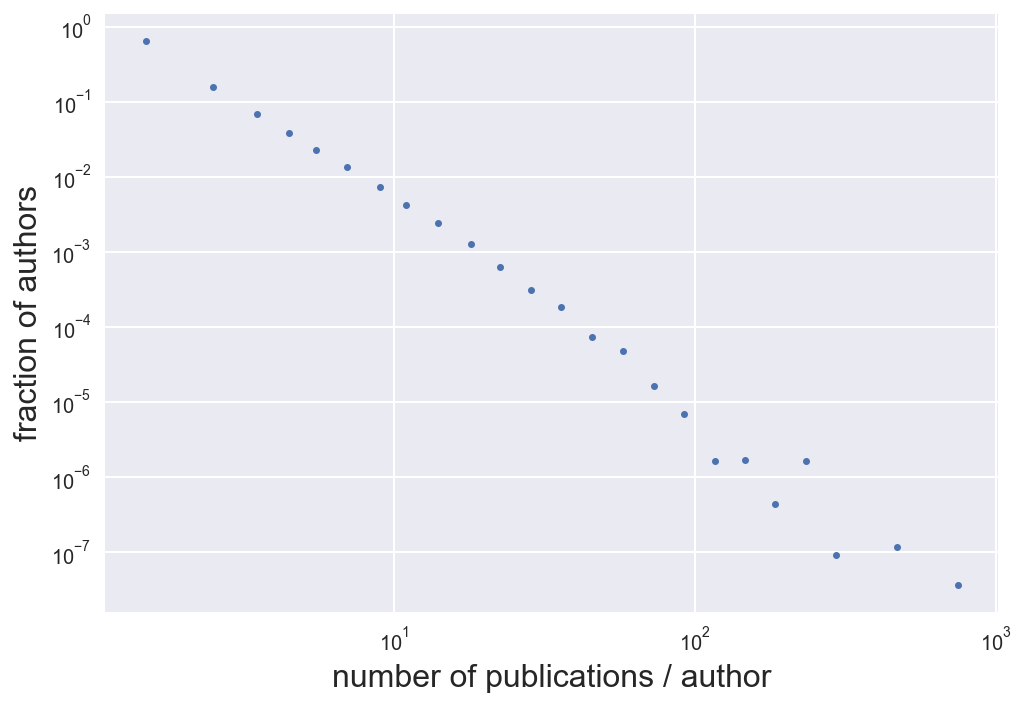

In [5]:
# plt.loglog(pd.Series(authors_list).value_counts().value_counts(),marker='.',linestyle='')

powerlaw.plot_pdf(pd.Series(authors_list).value_counts(),marker='.',linestyle='')

plt.xlabel('number of publications / author',size=16)
# plt.ylabel('number of authors',size=16);
plt.ylabel('fraction of authors',size=16);

## Build the graph

(mind that for now, for simplicity, we __neglect the number of publication shared by two authors__, therefore we have an _un-weighted graph_ - namely, there is a link, if there is _at least one publication_)

In [9]:
# # Define graph and add __nodes__:

# authors_graph = nx.Graph() # define graph
# authors_graph.add_nodes_from(authors_list) # add nodes
# del authors_list # free var name

# print('total number of authors:',authors_graph.number_of_nodes())

This is a _compact way_ to create the graph, that avoid avoids having 2 loops 
(one to create  a dict/list and another one to make a graph out of it)

In [7]:
# %%time

# # for the code inside the loop, credits to the 3rd answer here
# # http://stackoverflow.com/questions/10649673/how-to-generate-a-fully-connected-subgraph-from-node-list-using-pythons-network

# # for c in itt.combinations(authors_graph.nodes()[:4],2):

# #     print(c[0],c[1])

# # create the main graph 
# authors_graph = nx.Graph()

# # let's frist try with the first 1000 publications

# for row in publications.loc[:10000,:].itertuples():
    
#     if type(row.Authors)==str:
        
#         partial_list = row.Authors.split(',')
        
#         # create fully connected sub-graph for each publication        
#         sub_graph = nx.complete_graph(len(partial_list))
#         nx.relabel_nodes(sub_graph,dict(enumerate(partial_list)),copy=False)
        

#         #         check sub-graph
# #         print(sub_graph.number_of_nodes(),sub_graph.number_of_edges())
#         #         print(len(partial_list),sub_graph.number_of_edges()) 
        
#         # add new graph to main one         
#         authors_graph = nx.compose(authors_graph,sub_graph)
        

# #     old_weight = authors_graph.add_edge(c[0],c[1],weight = )
# #     old_weight += 1
# #     authors_graph.add_edge(c[0],c[1],weight = old_weight)

<center>
    <b>
        The full computation is done with  a parellelized version in `par_authors_net_from_subgraphs.py`
    </b>
    
    <p>
        (run on IC cluster, with python2.7)
    </p>
</center>

in case you wanna save the graph:

In [ ]:
# nx.write_gpickle(authors_graph,'authors_graph')
# trial_graph = nx.read_gpickle('authors_graph')   ## <-- how to read it back!

In [12]:
# print('# edges of a fully-connected graph with same size:',int(n_nodes*(n_nodes-1)/2))
# print('# edges of our graph:',len(authors_graph.edges()))

## Load the graph

 mind that __pickle__ have a 
 [well-known portability issues](http://stackoverflow.com/questions/28218466/unpickling-a-python-2-object-with-python-3)
 from python2 (write) to python3 (read), so have to use such encoding

In [341]:
import pickle

In [342]:
with open('authors_graph', 'rb') as my_f:

    authors_graph = pickle.load(my_f, encoding='latin1')

In [343]:
print('number of nodes:',nx.number_of_nodes(authors_graph))
print('number of edges:',nx.number_of_edges(authors_graph))

number of nodes: 158836
number of edges: 1010253


mind that __there are self-loops!__...

...that should be removed:

In [345]:
for sle in authors_graph.selfloop_edges():
    authors_graph.remove_edge(*sle)

# check that are indeed removed
len(authors_graph.selfloop_edges())

0

## Draw the graph   
(credits to [this answer on SO](credits to http://stackoverflow.com/questions/21711184/drawing-a-large-weighted-network-in-networkx-based-on-thickness))

In [15]:
# # choose the layout
# pos = nx.spring_layout(authors_graph)

# # get edge weight to use as width in the plot
# # edgewidth = [ d['weight'] for (u,v,d) in authors_graph.edges(data=True)]

# # acutal plot
# nx.draw_networkx_nodes(authors_graph, pos,node_size=3)
# nx.draw_networkx_edges(authors_graph, pos, width=0.1)
# #                        width = np.array(edgewidth)/1000.0)
# plt.axis('off');

# Network statistics 

## Connected components 
please, see 
[here](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html)
the relative documentation on networkx 

(here is an [example] on how to plot the 
[giant conponent](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/giant_component.html))

In [346]:
%%time

connected_comp = list(nx.connected_component_subgraphs(authors_graph))

print('number of connected components:',len(connected_comp))

number of connected components: 12097
CPU times: user 9.13 s, sys: 262 ms, total: 9.39 s
Wall time: 9.4 s


### distributions of connected components size

In [347]:
data_for_fit  = pd.Series([len(s) for s in connected_comp])

In [348]:
print('number of CCs with at least 2 authors:',sum(data_for_fit>1))

number of CCs with at least 2 authors: 2927


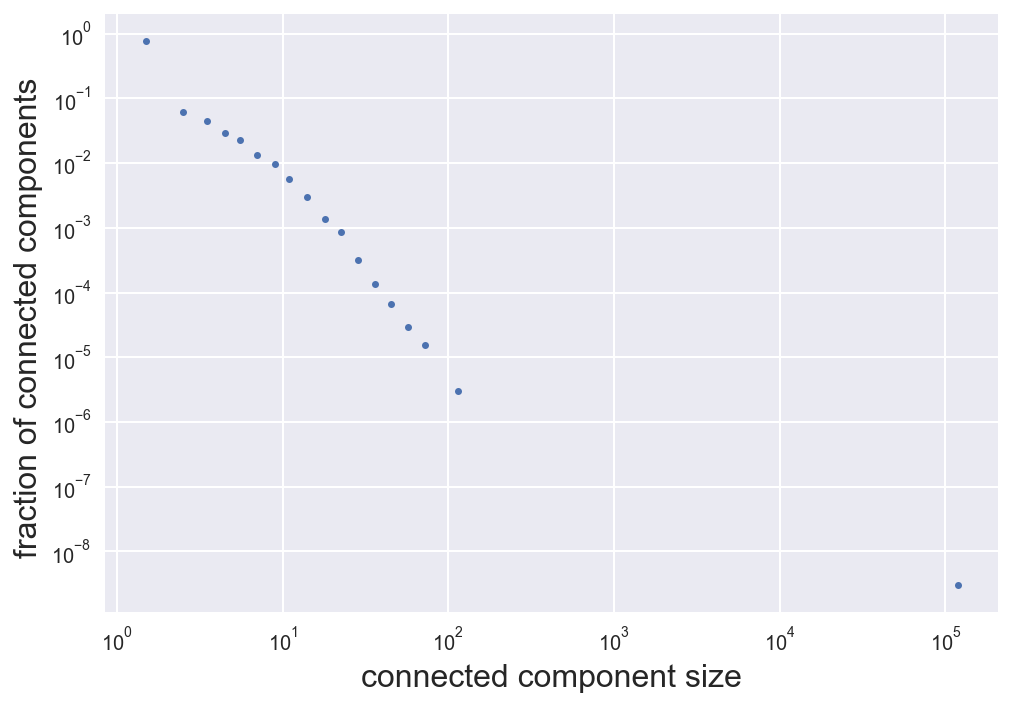

In [349]:
# plt.loglog(data_for_fit.value_counts(),marker='.',linestyle='')
# plt.ylabel('number of connected components ',size=16); 

powerlaw.plot_pdf(data_for_fit,marker='.',linestyle='')

plt.xlabel('connected component size',size=16)
plt.ylabel('fraction of connected components ',size=16); 

list of __10 largest CC__:

In [350]:
data_for_fit.sort_values(ascending=False)[:10]

0       132030
27         109
258         70
346         68
2617        67
657         61
24          61
244         55
123         51
140         50
dtype: int64

In [13]:
# fit_conn_comp_size = powerlaw.Fit(data_for_fit,discrete=True)

# print('fitted exponent:',fit_conn_comp_size.alpha)
# print('fitting error:',fit_conn_comp_size.sigma)

# print('xmin of the fit:',fit_conn_comp_size.xmin)
# print('xmax of the fit:',fit_conn_comp_size.xmax)

In [12]:
# powerlaw.plot_pdf(data_for_fit,marker='.',linestyle='',label='data')

# fit_conn_comp_size.power_law.plot_pdf(label='p-l fit')

# plt.legend()
# plt.ylabel('fraction of connected components', size=16)
# plt.xlabel('connected component size', size=16);

## Centralities measures
(usually performed on the largest CC)

### Degree

In [372]:
degree_authors = connected_comp[0].degree()

In [352]:
sorted(degree_authors.items(), key=lambda x: x[1],reverse=True)[:10]

[('et al.', 2456),
 ('others', 422),
 ('Vollenweider Peter', 398),
 ('LÃ¼scher Thomas F', 386),
 ('Mach FranÃ§ois', 384),
 ('Kutalik ZoltÃ¡n', 383),
 ('Auwerx Johan', 371),
 ('Gagneux Sebastien', 359),
 ('Aebersold Ruedi', 356),
 ('Bettler Bernhard', 349)]

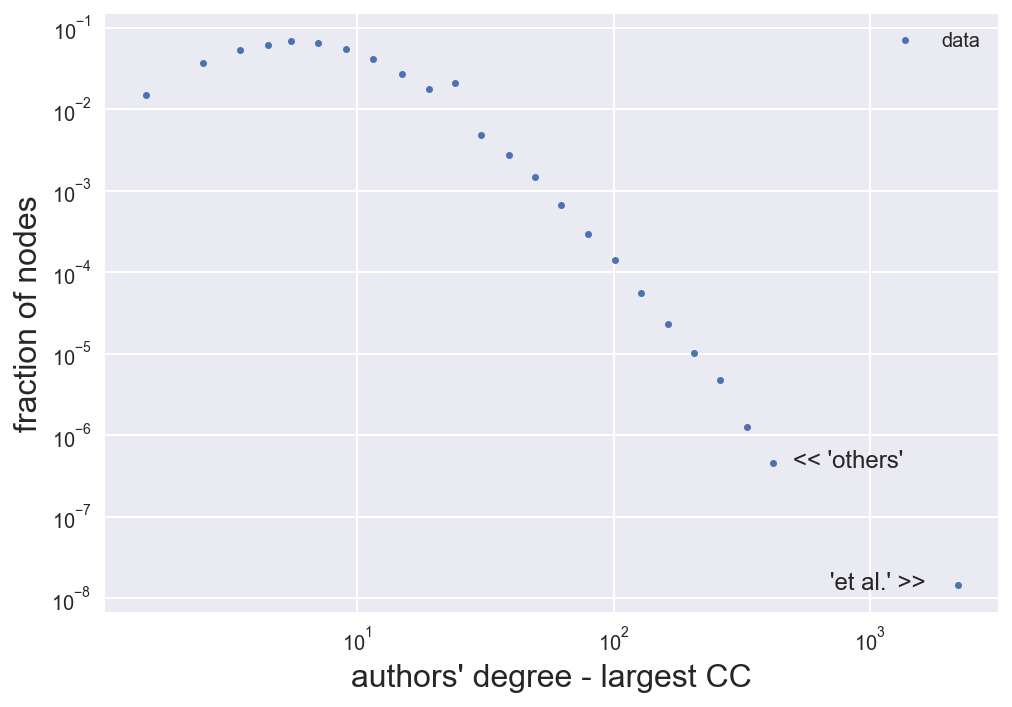

In [353]:
powerlaw.plot_pdf(list(degree_authors.values()),marker='.',linestyle='',label='data')
plt.ylabel('fraction of nodes',size=16)
plt.xlabel('authors\' degree - largest CC',size=16);
plt.legend();

plt.annotate('\'et al.\' >>',[700,10**(-7.9)])
plt.annotate('<< \'others\'',[500,10**(-6.4)]); 

# plt.savefig('./plots_for_paper/authors_degree_dist_wrong.pdf',bbox_inches='tight')

we have also __'et al.'__ and __'others'__ that should discarded !...

...from the graph...

In [354]:
authors_graph.remove_node('et al.')
authors_graph.remove_node('others')

...and from the CC0

In [355]:
connected_comp[0].remove_node('et al.')
connected_comp[0].remove_node('others')

In [356]:
print('number of nodes:',nx.number_of_nodes(authors_graph))
print('number of edges:',nx.number_of_edges(authors_graph))
print('number of nodes in the largest CC:',nx.number_of_nodes(connected_comp[0]))

number of nodes: 158834
number of edges: 1006695
number of nodes in the largest CC: 132028


some other checks...not big problems, afterall...

In [357]:
# [print(k,v) for k,v in degree_authors.items() if 'author' in k];
[print(k,v) for k,v in degree_authors.items() if 'consortium' in k];

GIANT consortium 5
+ many other authors (consortium) 7
SST-1M consortium 15
IntraBioDiv consortium 8
The CycliX consortium 10


__re-compute degree dist__, after removing non-real authors:

In [358]:
degree_authors = connected_comp[0].degree()

converted_degree = pd.Series(degree_authors)

non_zero_degree = converted_degree[converted_degree!=0]

remove useless vars:

In [359]:
del degree_authors
del converted_degree
gc.collect()

59976

here the algo fits automatically the __right tail only__:   
(finds the best `xmin`)

In [360]:
# MIND !! that we set xmin=1 - for a better comparison with log-normal
# fit_author_degree = powerlaw.Fit(data_for_fit,discrete=True,xmin=1)

fit_author_degree = powerlaw.Fit(non_zero_degree,discrete=True)

print('fitted exponent:',fit_author_degree.alpha)
print('fitting error:',fit_author_degree.sigma)

print('xmin of the fit:',fit_author_degree.xmin)
print('xmax of the fit:',fit_author_degree.xmax)

fitted exponent: 3.47760121705
fitting error: 0.0338857364288
xmin of the fit: 43.0
xmax of the fit: None


Calculating best minimal value for power law fit
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


`lognormal` it is a little (stat. sign.) better  fit...

In [361]:
fit_author_degree.distribution_compare('power_law','lognormal')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-13.623689326430831, 0.0013295108784109032)

plotting the degree dist + fit     
(for more fancy __inset plot__, please read 
[this post](http://matplotlib.org/1.3.1/mpl_toolkits/axes_grid/users/overview.html))

fit of the whole dist:  `lognormal` is fits stat. sign.  __much better__ (` p ~ 0` ):

In [362]:
logn_fit_author_degree = powerlaw.Fit(non_zero_degree,discrete=True,xmin=min(non_zero_degree))
logn_fit_author_degree.distribution_compare('power_law','lognormal')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-104479.43880978745, 0.0)

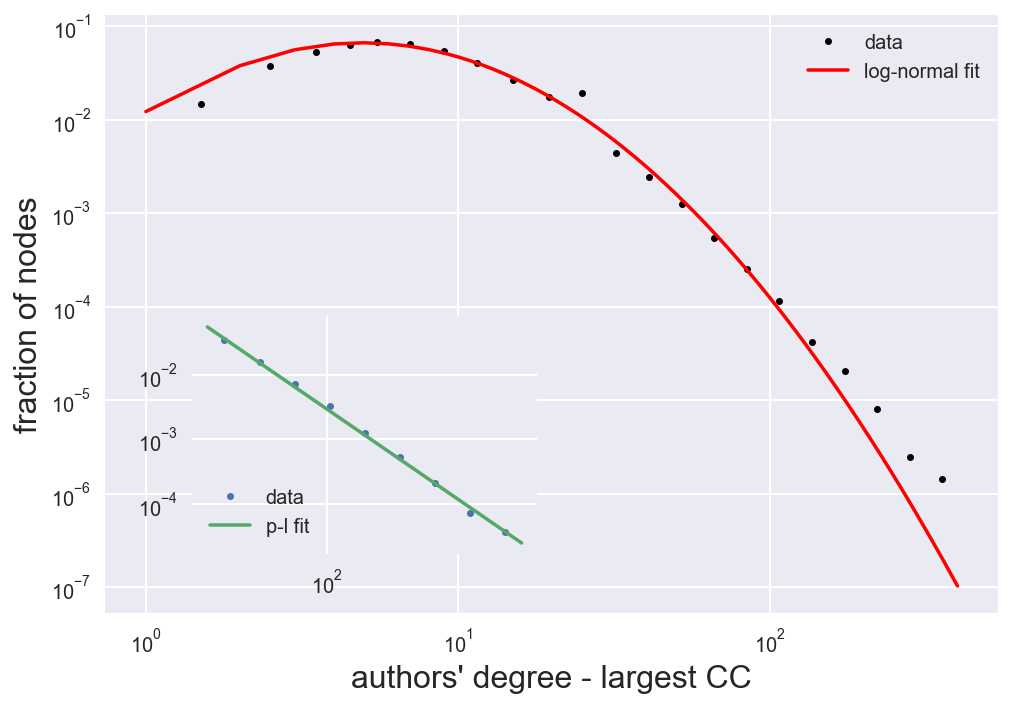

In [363]:
# main plot

# plt.loglog(non_zero_degree.value_counts(),marker='.',linestyle='',label='data')
powerlaw.plot_pdf(non_zero_degree,marker='.',linestyle='',label='data',c='k')
logn_fit_author_degree.lognormal.plot_pdf(label='log-normal fit',c='r')
plt.ylabel('fraction of nodes',size=16)
plt.xlabel('authors\' degree - largest CC',size=16)
# plt.axvline(x=43,label='xmin = 43')
plt.legend()



# inset plot

# fig, ax1 = plt.subplots()
left, bottom, width, height = [0.2, 0.2 , 0.3, 0.3 ]
plt.axes([left, bottom, width, height])
fit_author_degree.plot_pdf(marker='.',linestyle='',label='data')
fit_author_degree.power_law.plot_pdf(label='p-l fit')
plt.legend(loc=3) # https://matplotlib.org/api/legend_api.html

# save whole plot
plt.savefig('./plots_for_paper/authors_degree_dist.pdf',bbox_inches='tight')

In [107]:
print('sigma of log-nor:',logn_fit_author_degree.lognormal.sigma)
print('mu of log-nor:',logn_fit_author_degree.lognormal.mu)

sigma of log-nor: 0.849882315243
mu of log-nor: 2.31303026469


In [364]:
non_zero_degree.sort_values(ascending=False)[:10]

Vollenweider Peter    398
LÃ¼scher Thomas F     386
Mach FranÃ§ois        384
Kutalik ZoltÃ¡n       382
Auwerx Johan          371
Gagneux Sebastien     359
Aebersold Ruedi       356
Bettler Bernhard      349
Wurz P.               344
{Udry} S.             334
dtype: int64

### Betweenness centrality

In [98]:
# even on parallel TAKES TOO MUCH TIME!

# import parallel_betweenness
# %time parallel_betweenness.betweenness_centrality_parallel(connected_comp[0])
# %time betweenness_authors = nx.betweenness_centrality(connected_comp[0])

the computation is done on __IC cluster__ using `parallel_betweenness.py`

In [94]:
# sns.distplot(list(betweenness_authors.values()),kde=False)

# # plt.xscale('log')
# plt.yscale('log')

# plt.ylabel('number of authors',size=16)
# plt.xlabel('authors\' betweenness',size=16);

load computed data from file:

In [267]:
with open('./authors_bet.p', 'rb') as my_f:

    authors_bet = pickle.load(my_f)

tranform in series and _get rid of 0s_:

In [268]:
transf_author_bet = pd.Series(authors_bet)

non_zero_bet = transf_author_bet[transf_author_bet!=0]

remove useless vars:

In [269]:
del my_f
del authors_bet
del transf_author_bet
gc.collect()

49481

...and _remove 'et al.'_:

In [270]:
non_zero_bet.drop('et al.',inplace=True)
non_zero_bet.drop('others',inplace=True)

plot dist of betweenness:

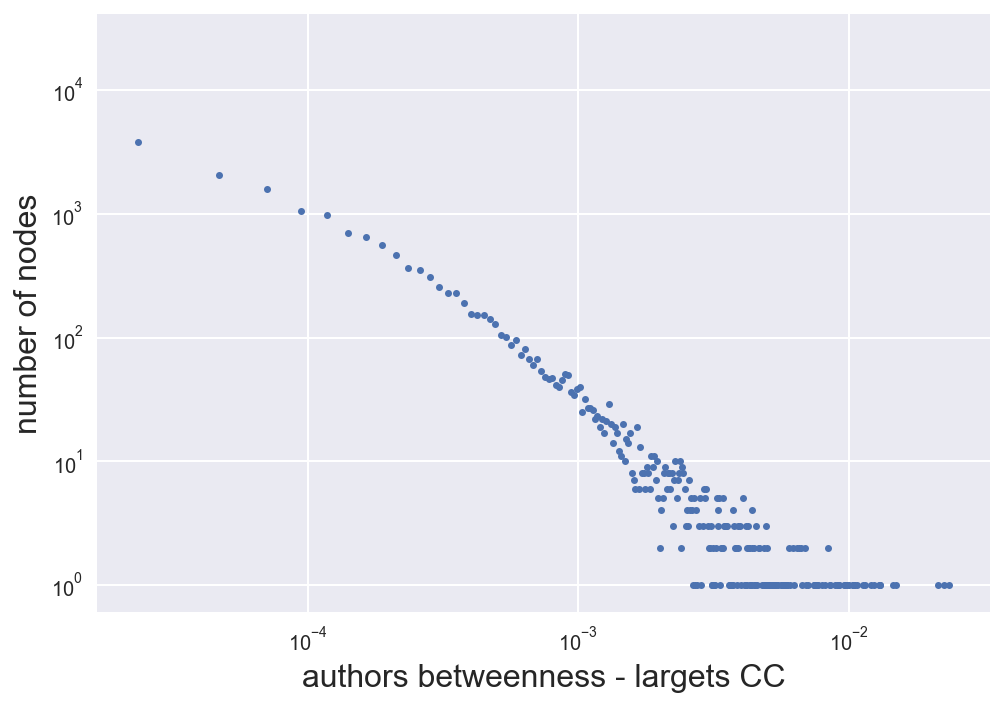

In [278]:
#  ok plot, but not great ....
# plt.hist(non_zero_bet, bins='fd');

plt.loglog(non_zero_bet.value_counts(bins=1000),
           marker='.',linestyle='',label='data');

plt.ylabel('number of nodes',size=16)
plt.xlabel('authors betweenness - largets CC',size=16);

plt.savefig('./plots_for_paper/authors_betweenness_dist.pdf',bbox_inches='tight')

In [264]:
# IT TAKES TOO MUCH TIME!!  -  don't know why

# fit_author_bet = powerlaw.Fit(non_zero_bet)

# print('fitted exponent:',fit_author_bet.alpha)
# print('fitting error:',fit_author_bet.sigma)

# print('xmin of the fit:',fit_author_bet.xmin)
# print('xmax of the fit:',fit_author_bet.xmax)

authors with largest betweenness:

In [277]:
non_zero_bet.sort_values(ascending=False)[:10]

{Bailey} S.        0.023518
Kutalik ZoltÃ¡n    0.022525
{McBride} C.~K.    0.021393
Aebersold Ruedi    0.014951
Rudin Markus       0.014536
                   0.013075
Bochud Murielle    0.012987
Negro F            0.012896
Neri Dario         0.012438
Caflisch Amedeo    0.012033
dtype: float64

## Degree Assortativity

basically there is __no degree assortativity:__

In [365]:
%time nx.degree_assortativity_coefficient(connected_comp[0])

CPU times: user 3.81 s, sys: 5.85 ms, total: 3.82 s
Wall time: 3.81 s


0.073879541021284634

## Rich-club coefficient

it takes too much time...

In [367]:
# %time authors_rcc = nx.rich_club_coefficient(connected_comp[0])

## Clustering coefficient

In [53]:
%time clustering_runners = nx.clustering(connected_comp[0])

CPU times: user 10.5 s, sys: 32.4 ms, total: 10.5 s
Wall time: 10.5 s


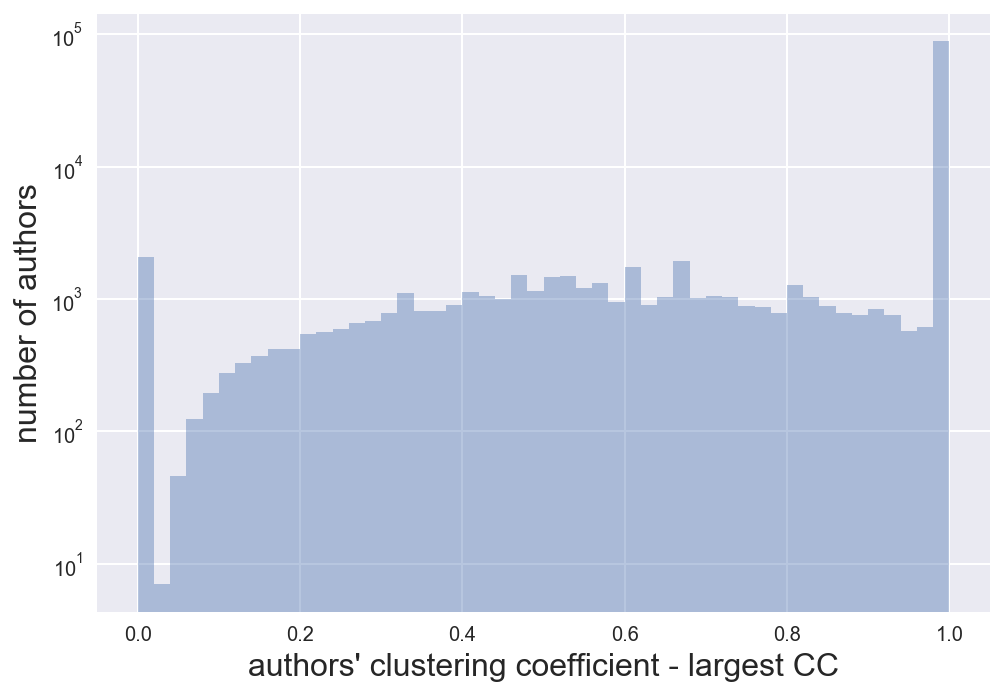

In [54]:
sns.distplot(list(clustering_runners.values()),kde=False)

plt.yscale('log')

plt.ylabel('number of authors',size=16)
plt.xlabel('authors\' clustering coefficient - largest CC',size=16);
plt.savefig('./plots_for_paper/authors_clu_coeff_dist.pdf',bbox_inches='tight')

here we check the 'usual' (??) anti-correlation between betweenness_centrality and clustering coefficient:

In [89]:
# plt.scatter(np.fromiter(clustering_runners.values(),dtype=float),
#             np.fromiter(betweenness_authors.values(),dtype=float),s=5)

# plt.xlabel('authors\' clustering coefficient',size=16)
# plt.ylabel('authors\' betweenness',size=16);

## Add attributes to nodes 

In [322]:
persons = pd.read_csv('./data_SNSF/P3_PersonExport.csv',sep=';')
print(persons.shape)
persons.head(3)

(93565, 13)


,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,ORCID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person
0,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN
1,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,NaN,36549,NaN
2,Aaberg,Johan,male,NaN,NaN,575257,NaN,NaN,NaN,NaN,NaN,119868,NaN


this is taking too much time -.- ....    
(execution stopped)

In [339]:
%%time

num_nodes_in_list = 0

for row in persons[persons['Last Name'].notnull() & persons['First Name'].notnull()].itertuples():
    
#     print(persons.loc[row.Index,['First Name','Last Name']])
    full_name = persons.loc[row.Index,'Last Name'] + ' ' +  persons.loc[row.Index,'First Name']
    
    if full_name in connected_comp[0].nodes():
        num_nodes_in_list += 1
        
num_nodes_in_list

## Community detection and analysis

In [292]:
%%time

partition = community.best_partition(connected_comp[0])
print('number of communities:', len(set(partition.values())))

number of communities: 231
CPU times: user 46.2 s, sys: 245 ms, total: 46.5 s
Wall time: 46.5 s


Analysing communities:

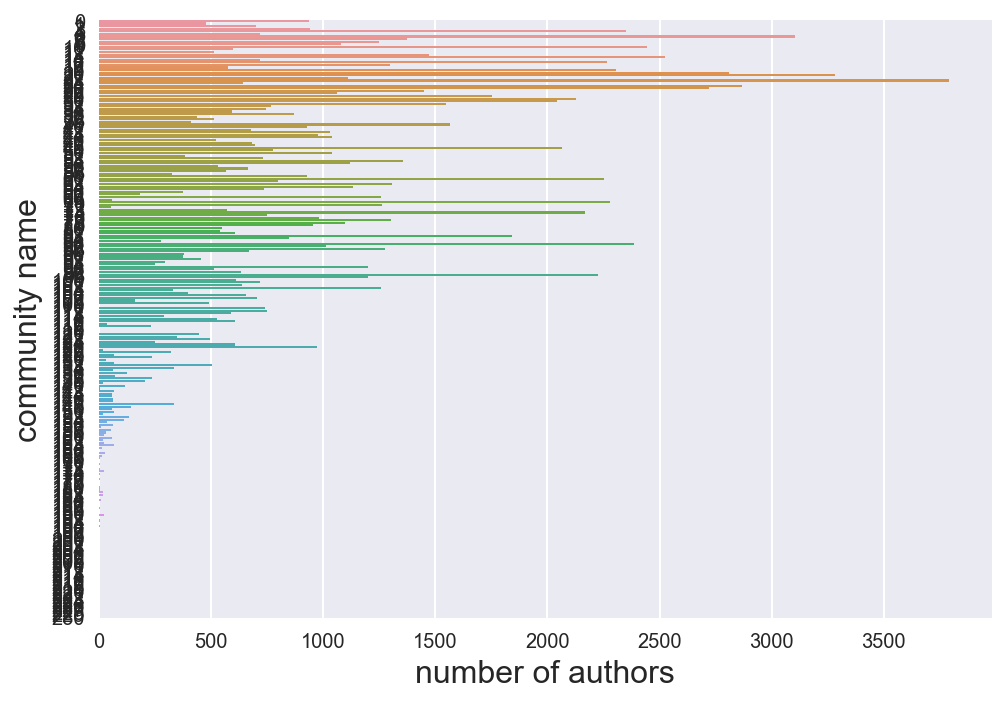

In [293]:
sns.countplot(y=list(partition.values()))

plt.ylabel('community name',size=16)
plt.xlabel('number of authors',size=16);

### distribution of community size

In [ ]:
communities_sizes = pd.Series(list(partition.values())).value_counts()

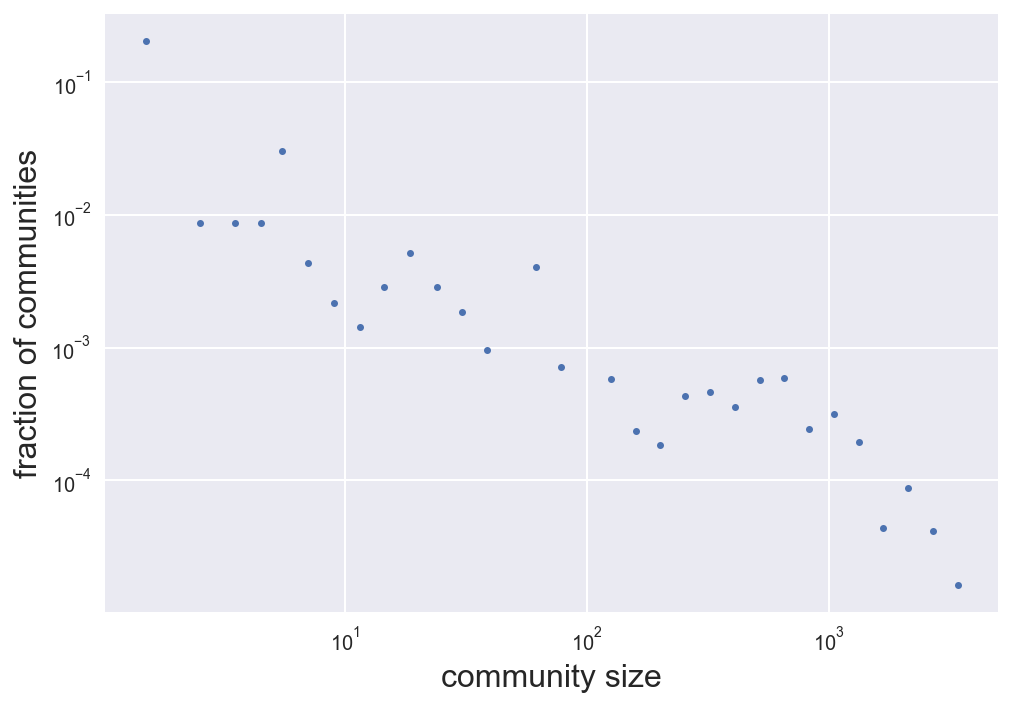

In [314]:
powerlaw.plot_pdf(communities_sizes,marker='.',linestyle='')
# plt.loglog(communities_sizes[communities_sizes>1000].value_counts(bins=100),
#            marker='.',linestyle='')

plt.xlabel('community size',size=16);
plt.ylabel('fraction of communities',size=16); 

In [316]:
communities_sizes.sort_values(ascending=False)[:10]

23    3791
21    3281
6     3104
25    2870
20    2811
26    2719
14    2524
10    2446
86    2386
4     2352
dtype: int64

In [2]:
# comm0 = [k for k,v in partition.items() if v==0]
# comm1 = [k for k,v in partition.items() if v==1]
# comm2 = [k for k,v in partition.items() if v==2]

# communities_df = pd.DataFrame([len(comm0),len(comm1),len(comm2)])
# communities_df.columns = ['number_nodes']
# communities_df

In [370]:
# some example check:  
# look for node with k>100, in community 23
[print(k,connected_comp[0].degree(k)) for k,v in partition.items() if v==23 & connected_comp[0].degree(k)>100]

[]

 communities of very ( > some threshold = 200) connected nodes:

In [388]:
[print(k,v)  for k,v in partition.items() if connected_comp[0].degree(k)>200];

 0
Luan Jian'an 70
Lovis C. 31
Egger Matthias 6
Neri Dario 95
Telenti Amalio 6
Decurtins Silvio 4
Recher Mike 21
Kutalik ZoltÃ¡n 70
Akdis M 45
Aebersold Ruedi 26
Suter Ueli 123
Vollenweider Peter 70
Utzinger JÃ¼rg 97
Sallusto Federica 26
Waeber GÃ©rard 70
GÃ¼nthard Huldrych F 6
Keiser Jennifer 97
Antonarakis SE 40
Zhao Jing Hua 70
Reith Walter 21
Merkler Doron 21
Matter Christian M. 10
{Udry} S. 17
Gassmann Max 88
Wurz P. 51
Krause Karl-Heinz 49
Montecucco Fabrizio 10
Mach F 61
Waterhouse Robert M 44
Bochud Pierre-Yves 6
Conen David 70
Joos F. 74
Moradpour Darius 6
Liu Shi-Xia 4
Schawinski Kevin 8
Pabst Thomas 33
Thorens Bernard 49
Heim Markus H 6
Tamm Michael 29
Schoonjans Kristina 81
Rodondi Nicolas 70
Moch Holger 20
Picotti Paola 26
Bettler Bernhard 30
LÃ¼scher Thomas F 10
Calandra Thierry 96
{Queloz} D. 17
Graf Rolf 20
Battegay Manuel 6
Peter Matthias 26
Montecucco F 61
Thomas N. 51
Baltensperger U. 3
Pepe F. 31
Matter Christian M 10
Zdobnov Evgeny M 44
Stolz Daiana 29
Keiser Olivi

# OTHER CODE

Drawing communities on graph:

In [3]:
# size = float(len(set(partition.values())))
# pos = nx.spring_layout(authors_graph)

# count = 0.
# for com in set(partition.values()) :
#     count = count + 1.
#     list_nodes = [nodes for nodes in partition.keys()
#                                 if partition[nodes] == com]
#     nx.draw_networkx_nodes(authors_graph, pos, list_nodes, node_size = 10,
#                                 node_color = str(count / size))


# nx.draw_networkx_edges(authors_graph,pos, width = np.array(edgewidth)/1000.0)
# plt.axis('off')
# plt.show();

check size of large vars:

In [279]:
import sys

In [289]:
for var, obj in locals().items():
    
    if sys.getsizeof(obj)/1000000 > 10:
        print(var, sys.getsizeof(obj)/1000000)

publications 193.468332
_41 10.550583
_48 10.550583
non_zero_degree 10.546916
_50 10.546916
_82 10.546916
